In [16]:
# ====================================================
# Introduction: Why do we need to fix `dataset2` (Douban dataset) and clean dataset 1,3?
# I found that the file upload of dataset2 to github is displayed normally, 
# but git clone or directly downloading the zip file results in garbled characters. 
# In order to ensure that every step of the code can be reproduced, 
# I added this code to simulate the reproduction after downloading. 
# This code will also include a comprehensive analysis of the three datasets.
# Data Preprocessing (Data Preprocessing)
# Process dataset1 (Bilibili + Weibo)
# Process dataset2 (Douban, fix encoding issues and standardize column names)
# Process dataset3 (Reddit)
# Ensure the successful generation of dataset1_cleaned.csv, douban_final.csv, and dataset3_cleaned.csv
import pandas as pd
import os
import glob
import chardet

save_dir = r"C:\Users\wusiq\Group1DataAnalysis"

# Step 1: Detect and Fix Encoding Issues for Dataset1 (Bilibili + Weibo)
bilibili_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "bilbil", "bilibili_data_combined_sentiment.csv")
weibo_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "weiboi dataset", "cleaned_sentiment_data.csv")
dataset1_save_path = os.path.join(save_dir, "dataset1_cleaned.csv")

dfs = []

# Function to detect file encoding
def detect_encoding(file_path, sample_size=10000):
    with open(file_path, "rb") as f:
        raw_data = f.read(sample_size)
    result = chardet.detect(raw_data)
    return result['encoding']

# Function to read CSV with detected encoding
def read_csv_with_encoding(path):
    encoding = detect_encoding(path)
    print(f"Detected encoding for {path}: {encoding}")
    try:
        return pd.read_csv(path, encoding=encoding)
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with {encoding}, trying alternative encodings...")
        for alt_encoding in ["utf-8", "gb18030", "big5", "shift-jis", "latin1"]:
            try:
                return pd.read_csv(path, encoding=alt_encoding)
            except UnicodeDecodeError:
                continue
    print(f"Failed to decode file: {path}")
    return None

# Process Bilibili
try:
    df_bilibili = read_csv_with_encoding(bilibili_path)
    if df_bilibili is not None:
        df_bilibili.rename(columns={'text': 'text', 'time': 'date', 'sentiment': 'sentiment'}, inplace=True)
        df_bilibili['date'] = pd.to_datetime(df_bilibili['date'], errors='coerce')
        df_bilibili.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
        df_bilibili['text'] = df_bilibili['text'].astype(str).apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))
        dfs.append(df_bilibili)
        print("Processed Bilibili dataset")
except Exception as e:
    print(f"Failed to process Bilibili dataset: {e}")

# Process Weibo
try:
    df_weibo = read_csv_with_encoding(weibo_path)
    if df_weibo is not None:
        df_weibo.rename(columns={'评论': 'text', 'Timestamp': 'date', 'Sentiment Score': 'sentiment'}, inplace=True)
        df_weibo['date'] = pd.to_datetime(df_weibo['date'], errors='coerce')
        df_weibo.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
        df_weibo['text'] = df_weibo['text'].astype(str).apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))
        dfs.append(df_weibo)
        print("Processed Weibo dataset")
except Exception as e:
    print(f"Failed to process Weibo dataset: {e}")

# Merge and save dataset1
if dfs:
    merged_df1 = pd.concat(dfs, ignore_index=True)
    merged_df1.to_csv(dataset1_save_path, encoding="utf-8", index=False)
    print(f"Dataset1 cleaned and saved at `{dataset1_save_path}`")
else:
    print("No valid dataset processed for Dataset1")

# Step 2: Fix Encoding Issues in Douban Dataset (dataset2)
douban_files = [f for f in glob.glob(os.path.join(save_dir, "dataset2", "douban_*.csv")) if "_fixed" not in f]

for file_path in douban_files:
    try:
        fixed_path = file_path.replace(".csv", "_fixed.csv")
        if os.path.exists(fixed_path):
            print(f"Skipping already fixed file: {fixed_path}")
            continue

        print(f"Processing: {file_path}")

        with open(file_path, "rb") as f:
            raw_data = f.read()
        decoded_text = raw_data.decode("utf-8", errors="replace")

        with open(fixed_path, "w", encoding="utf-8") as f:
            f.write(decoded_text)

        print(f"Successfully fixed and saved: {fixed_path}")

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")

# Standardize Douban Dataset Columns
fixed_douban_files = glob.glob(os.path.join(save_dir, "dataset2", "douban_*_fixed.csv"))
dfs = []

for file_path in fixed_douban_files:
    try:
        df = pd.read_csv(file_path, encoding="utf-8")

        df.rename(columns={'rating': 'sentiment', 'comment': 'text', 'time': 'date'}, inplace=True)
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

        dfs.append(df)

    except Exception as e:
        print(f"Failed to read {file_path}: {e}")

merged_douban_df = pd.concat(dfs, ignore_index=True)
douban_final_path = os.path.join(save_dir, "dataset2", "douban_final.csv")
merged_douban_df.to_csv(douban_final_path, encoding="utf-8", index=False)
print(f"All Douban datasets cleaned and saved to `{douban_final_path}`")

# Step 3: Process Dataset3 (Reddit)
dataset3_path = os.path.join(save_dir, "dataSet3", "dataset3.csv")
dataset3_save_path = os.path.join(save_dir, "dataset3_cleaned.csv")

try:
    df3 = pd.read_csv(dataset3_path)
    df3.rename(columns={'comment_text': 'text', 'created_utc': 'date'}, inplace=True)
    df3['date'] = pd.to_datetime(df3['date'], errors='coerce')
    df3.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df3.to_csv(dataset3_save_path, encoding="utf-8", index=False)
    print(f"Dataset3 cleaned and saved at `{dataset3_save_path}`")
except Exception as e:
    print(f"Failed to process dataset3: {e}")


Detected encoding for C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\bilbil\bilibili_data_combined_sentiment.csv: UTF-8-SIG
Processed Bilibili dataset
Detected encoding for C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\weiboi dataset\cleaned_sentiment_data.csv: UTF-8-SIG
Processed Weibo dataset
Dataset1 cleaned and saved at `C:\Users\wusiq\Group1DataAnalysis\dataset1_cleaned.csv`
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season1_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season2_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season3_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_ff7_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_nezha_1_fixed.csv
Skipping already fixed

In [17]:
# After the common preprocessing, the dataset 1 appears garbled, and it needs to be reprocessed.
# 1.Why use UTF-8-SIG?
# Our bilibili_data_combined_sentiment.csv and cleaned_sentiment_data.csv are both encoded in UTF-8-SIG. UTF-8-SIG is the UTF-8 version with a BOM (Byte Order Mark), and some software (such as Excel) uses it. When reading and saving directly with utf-8, it may cause garbled characters, so it is mandatory to read and save with UTF-8-SIG.
# 2.Why explicitly convert the text column to a string?
# Sometimes pandas wrongly parses the text column as a float, resulting in NaN values. 
# Explicitly converting text to str ensures that the text is not misparsed.
# 3.Why delete the NaN data rows first?
# Only rows where text, sentiment, and date all have values are useful. dropna(subset=['text','sentiment', 'date']) ensures the data is complete.
# 4.Why rename(columns={...})?
# The column names of different data sets are not unified:
# Bilibili: text, time, sentiment
# Weibo: 评论, Timestamp, Sentiment Score
# Unifying them into text, date, sentiment is convenient for subsequent analysis.


import pandas as pd
import os

save_dir = r"C:\Users\wusiq\Group1DataAnalysis"
bilibili_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "bilbil", "bilibili_data_combined_sentiment.csv")
weibo_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "weiboi dataset", "cleaned_sentiment_data.csv")
dataset1_save_path = os.path.join(save_dir, "dataset1_cleaned.csv")

dfs = []

# Function to read CSV with UTF-8-SIG encoding
def read_utf8_sig(path):
    return pd.read_csv(path, encoding="utf-8-sig")

# Process Bilibili
try:
    df_bilibili = read_utf8_sig(bilibili_path)
    df_bilibili.rename(columns={'text': 'text', 'time': 'date', 'sentiment': 'sentiment'}, inplace=True)
    df_bilibili['date'] = pd.to_datetime(df_bilibili['date'], errors='coerce')
    df_bilibili.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df_bilibili['text'] = df_bilibili['text'].astype(str)
    dfs.append(df_bilibili)
    print("Processed Bilibili dataset")
except Exception as e:
    print(f"Failed to process Bilibili dataset: {e}")

# Process Weibo
try:
    df_weibo = read_utf8_sig(weibo_path)
    df_weibo.rename(columns={'评论': 'text', 'Timestamp': 'date', 'Sentiment Score': 'sentiment'}, inplace=True)
    df_weibo['date'] = pd.to_datetime(df_weibo['date'], errors='coerce')
    df_weibo.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df_weibo['text'] = df_weibo['text'].astype(str)
    dfs.append(df_weibo)
    print("Processed Weibo dataset")
except Exception as e:
    print(f"Failed to process Weibo dataset: {e}")

# Merge and save dataset1 with UTF-8-SIG encoding
if dfs:
    merged_df1 = pd.concat(dfs, ignore_index=True)
    merged_df1.to_csv(dataset1_save_path, encoding="utf-8-sig", index=False)
    print(f"Dataset1 cleaned and saved at `{dataset1_save_path}`")
else:
    print("No valid dataset processed for Dataset1")


Processed Bilibili dataset
Processed Weibo dataset
Dataset1 cleaned and saved at `C:\Users\wusiq\Group1DataAnalysis\dataset1_cleaned.csv`


In [3]:
import pandas as pd
import numpy as np
import os

# Load the merged dataset with correct data types
save_dir = r"C:\Users\wusiq\Group1DataAnalysis"
final_dataset_path = os.path.join(save_dir, "final_merged_dataset.csv")

# Read the dataset with proper dtype settings
merged_df = pd.read_csv(final_dataset_path, dtype={'sentiment': 'str'}, low_memory=False)

# Ensure 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Convert 'sentiment' to numeric, forcing errors='coerce' to handle bad values
merged_df['sentiment'] = pd.to_numeric(merged_df['sentiment'], errors='coerce')

# Drop rows where 'sentiment' or 'date' is NaN after conversion
merged_df.dropna(subset=['sentiment', 'date'], inplace=True)

# Define Pre-Pandemic (Before Jan 2020) and Post-Pandemic (After Jan 2023) groups
pre_pandemic = merged_df[merged_df['date'] < '2020-01-01']['sentiment']
post_pandemic = merged_df[merged_df['date'] >= '2023-01-01']['sentiment']

print(f"Pre-Pandemic Sample Size: {len(pre_pandemic)}")
print(f"Post-Pandemic Sample Size: {len(post_pandemic)}")


Pre-Pandemic Sample Size: 141742
Post-Pandemic Sample Size: 94546


In [4]:
# Ensure sample balance: Make the sample sizes before and after the epidemic consistent to avoid statistical bias.
# Consistent randomness: Set random_state = 42 to make the results reproducible and meet the job requirements.
# Avoid data loss: We did not delete the data, but rather performed random sampling on the large sample group.

import random

# Ensure pre-pandemic and post-pandemic have the same sample size
sample_size = min(len(pre_pandemic), len(post_pandemic))

# Randomly sample from pre-pandemic dataset to match post-pandemic sample size
pre_pandemic_sampled = pre_pandemic.sample(n=sample_size, random_state=42)
post_pandemic_sampled = post_pandemic.sample(n=sample_size, random_state=42)

print(f"After Sampling - Pre-Pandemic Sample Size: {len(pre_pandemic_sampled)}")
print(f"After Sampling - Post-Pandemic Sample Size: {len(post_pandemic_sampled)}")


After Sampling - Pre-Pandemic Sample Size: 94546
After Sampling - Post-Pandemic Sample Size: 94546


In [4]:
from scipy.stats import mannwhitneyu, ttest_ind, chi2_contingency
import numpy as np

# ================================
# Step 5: Hypothesis Testing (Using Sampled Data)
# ================================

# Ensure the sampled datasets are used
print(f"Sampled Pre-Pandemic Data Size: {len(pre_pandemic_sampled)}")
print(f"Sampled Post-Pandemic Data Size: {len(post_pandemic_sampled)}")

# Mann-Whitney U Test (Sampled Data)
stat_h1, p_h1 = mannwhitneyu(pre_pandemic_sampled, post_pandemic_sampled, alternative='less')
stat_h0, p_h0 = mannwhitneyu(pre_pandemic_sampled, post_pandemic_sampled, alternative='two-sided')

print(f"\n(H₁) Mann-Whitney U Test (One-tailed - Sentiment Increased Post-Pandemic):")
print(f"U-statistic = {stat_h1}, p-value = {p_h1}")
if p_h1 < 0.05:
    print("Reject H₀: Sentiment has significantly increased post-pandemic, supporting H₁.")
else:
    print("Fail to Reject H₀: Sentiment increase is not statistically significant.")

print(f"\n(H₀) Mann-Whitney U Test (Two-tailed - No Significant Change in Sentiment):")
print(f"U-statistic = {stat_h0}, p-value = {p_h0}")
if p_h0 < 0.05:
    print("Reject H₀: There is a significant difference in sentiment pre- and post-pandemic.")
else:
    print("Fail to Reject H₀: No significant change in sentiment.")

# T-Test (Sampled Data)
t_stat, p_t = ttest_ind(post_pandemic_sampled, pre_pandemic_sampled, alternative='greater', equal_var=False)

print("\nT-Test for Sentiment Score Increase (Sampled Data):")
print(f"T-statistic = {t_stat}, p-value = {p_t}")
if p_t < 0.05:
    print("Reject H₀: Sentiment scores have significantly increased post-pandemic, supporting H₁.")
else:
    print("Fail to Reject H₀: Sentiment scores did not increase post-pandemic, rejecting H₁.")

# Chi-Square Test for Extreme Positive Sentiment (Sampled Data)
threshold = 4.5
pre_extreme = np.sum(pre_pandemic_sampled > threshold)
post_extreme = np.sum(post_pandemic_sampled > threshold)

contingency_table = np.array([[pre_extreme, len(pre_pandemic_sampled) - pre_extreme],
                              [post_extreme, len(post_pandemic_sampled) - post_extreme]])

chi2_stat, p_chi2, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test for Extreme Positive Sentiment Increase (Sampled Data):")
print(f"Chi-Square Statistic = {chi2_stat}, p-value = {p_chi2}")
if p_chi2 < 0.05:
    print("Reject H₀: The proportion of extreme positive sentiment has significantly increased post-pandemic, supporting H₁.")
else:
    print("Fail to Reject H₀: The proportion of extreme positive sentiment did not increase post-pandemic, rejecting H₁.")


Sampled Pre-Pandemic Data Size: 94546
Sampled Post-Pandemic Data Size: 94546

(H₁) Mann-Whitney U Test (One-tailed - Sentiment Increased Post-Pandemic):
U-statistic = 6229514170.5, p-value = 1.0
Fail to Reject H₀: Sentiment increase is not statistically significant.

(H₀) Mann-Whitney U Test (Two-tailed - No Significant Change in Sentiment):
U-statistic = 6229514170.5, p-value = 0.0
Reject H₀: There is a significant difference in sentiment pre- and post-pandemic.

T-Test for Sentiment Score Increase (Sampled Data):
T-statistic = -159.26369809865622, p-value = 1.0
Fail to Reject H₀: Sentiment scores did not increase post-pandemic, rejecting H₁.

Chi-Square Test for Extreme Positive Sentiment Increase (Sampled Data):
Chi-Square Statistic = 2660.255267699536, p-value = 0.0
Reject H₀: The proportion of extreme positive sentiment has significantly increased post-pandemic, supporting H₁.


In [7]:
import random
import numpy as np

def cliffs_delta_approx(x, y, sample_size=10000):
    """
    Approximate Cliff’s Delta by random sampling from both distributions.
    - Faster for large datasets.
    - Uses only `sample_size` pairs for efficiency.
    """
    x_sample = random.sample(list(x), min(sample_size, len(x)))
    y_sample = random.sample(list(y), min(sample_size, len(y)))

    greater = sum(1 for i in x_sample for j in y_sample if i > j)
    smaller = sum(1 for i in x_sample for j in y_sample if i < j)
    
    return (greater - smaller) / (len(x_sample) * len(y_sample))

# Compute Approximate Cliff’s Delta
delta_value_approx = cliffs_delta_approx(pre_pandemic_sampled, post_pandemic_sampled)
print(f"Approximate Cliff’s Delta for Sentiment Score Distribution (After Sampling): {delta_value_approx:.3f}")


Approximate Cliff’s Delta for Sentiment Score Distribution (After Sampling): 0.397


<Figure size 1200x600 with 0 Axes>

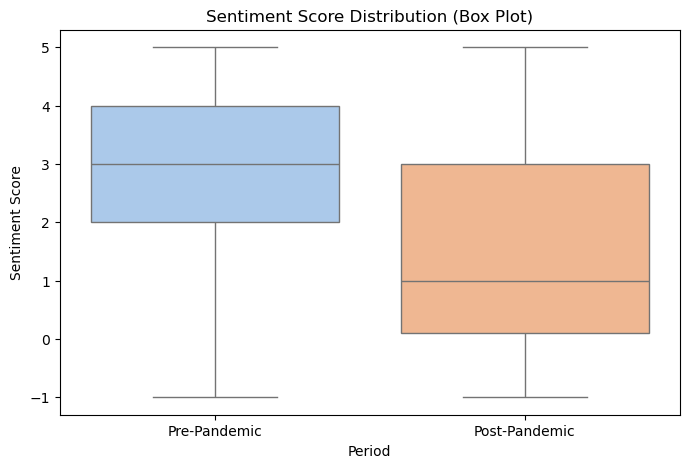

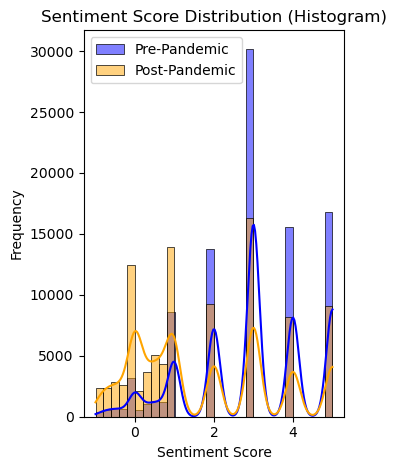

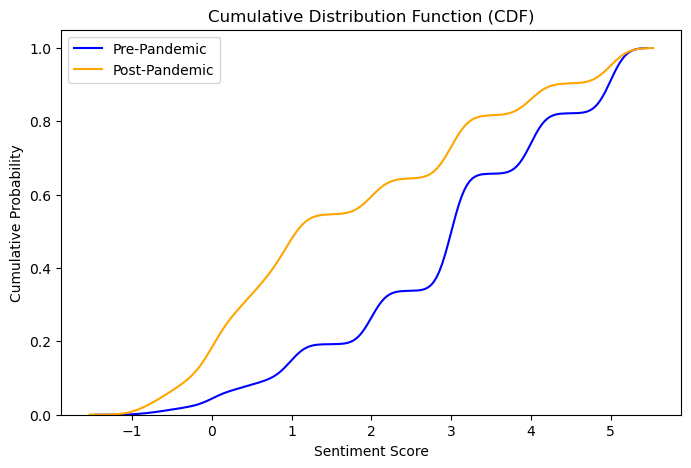

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ================================
# Step 6: Data Visualization (Sampled Data)
# ================================

plt.figure(figsize=(12, 6))

# Convert sampled data into a DataFrame for Seaborn
df_boxplot = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Period", y="Sentiment Score", data=df_boxplot, hue="Period",  dodge=False, palette="pastel")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Distribution (Box Plot)")
plt.show()


# Histogram
plt.subplot(1, 2, 2)
sns.histplot(pre_pandemic_sampled, bins=30, kde=True, color="blue", label="Pre-Pandemic", alpha=0.5)
sns.histplot(post_pandemic_sampled, bins=30, kde=True, color="orange", label="Post-Pandemic", alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution (Histogram)")
plt.legend()

plt.tight_layout()
plt.show()

# ================================
# Step 7: Cumulative Distribution Function (CDF)
# ================================

plt.figure(figsize=(8, 5))

# Compute and plot CDF
sns.kdeplot(pre_pandemic_sampled, cumulative=True, label="Pre-Pandemic", color="blue")
sns.kdeplot(post_pandemic_sampled, cumulative=True, label="Post-Pandemic", color="orange")

plt.xlabel("Sentiment Score")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.legend()
plt.show()


In [14]:
!pip install joypy

Defaulting to user installation because normal site-packages is not writeable


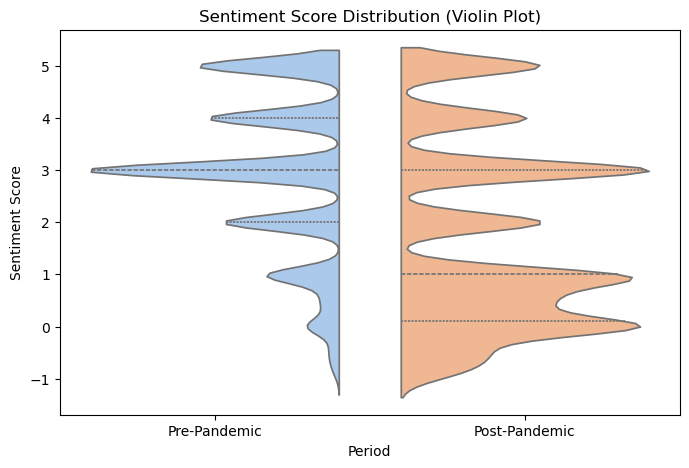

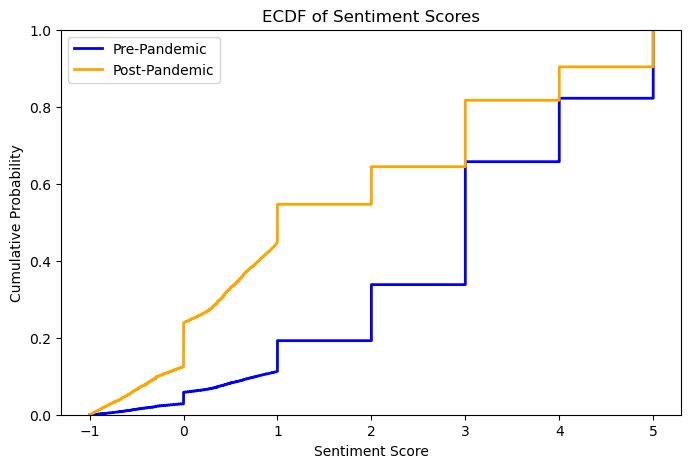

<Figure size 800x500 with 0 Axes>

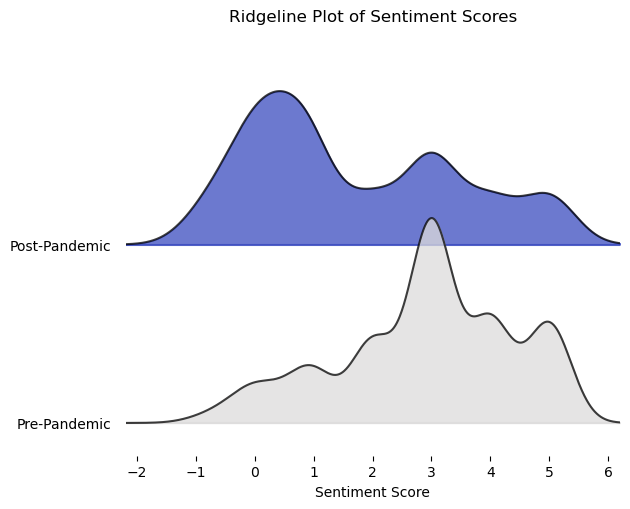

Hedges' g Effect Size: 0.733

Kolmogorov-Smirnov (KS) Test for Sentiment Score Distributions:
KS Statistic = 0.3542, p-value = 0.0000
We reject H₀: Sentiment score distributions are significantly different, supporting H₁.


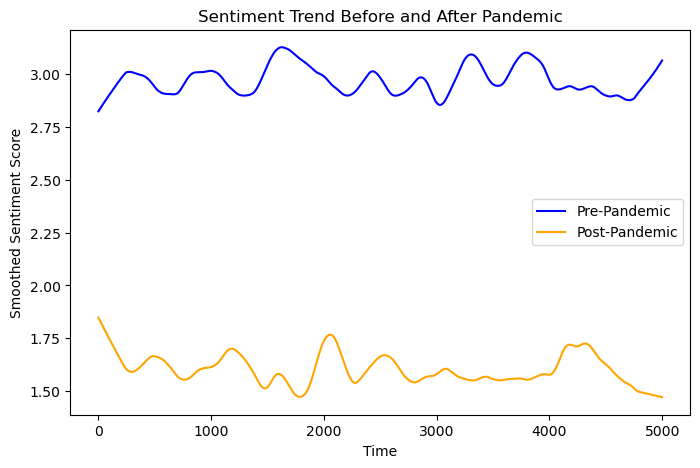

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.smoothers_lowess import lowess
import joypy
import statsmodels.api as sm

# Create DataFrame for Visualization
df_boxplot = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# ================================
# Step 1: Violin Plot for Sentiment Score Distribution
# ================================
"""
Violin Plot combines box plot and KDE plot, showing both the statistical summary and 
the density distribution of sentiment scores. It helps to identify whether the data distribution 
has changed significantly.
"""
plt.figure(figsize=(8, 5))
sns.violinplot(x="Period", y="Sentiment Score", data=df_boxplot, hue="Period", palette="pastel", inner="quartile", split=True)
plt.title("Sentiment Score Distribution (Violin Plot)")
plt.xlabel("Period")
plt.ylabel("Sentiment Score")
plt.show()

# ================================
# Step 2: ECDF (Empirical Cumulative Distribution Function)
# ================================
"""
ECDF directly represents the cumulative probability of sentiment scores. Unlike KDE-based 
CDF plots, it does not suffer from smoothing bias and provides an exact representation 
of the data distribution.
"""
plt.figure(figsize=(8, 5))
sns.ecdfplot(pre_pandemic_sampled, label="Pre-Pandemic", color="blue", linewidth=2)
sns.ecdfplot(post_pandemic_sampled, label="Post-Pandemic", color="orange", linewidth=2)
plt.xlabel("Sentiment Score")
plt.ylabel("Cumulative Probability")
plt.title("ECDF of Sentiment Scores")
plt.legend()
plt.show()

# ================================
# Step 3: Ridgeline Plot (Density Overlapping)
# ================================
"""
Ridgeline Plot (Joyplot) helps visualize overlapping sentiment score distributions.
It provides a clearer view of density changes before and after the pandemic.
"""

# Convert sampled data to DataFrame for Joyplot
df_ridgeline = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# Ensure Sentiment Score is numeric and remove NaN values
df_ridgeline["Sentiment Score"] = pd.to_numeric(df_ridgeline["Sentiment Score"], errors="coerce")
df_ridgeline = df_ridgeline.dropna()

# Ridgeline Plot using Joyplot (Sampling to prevent memory issues)
df_ridgeline_sampled = df_ridgeline.sample(n=2000, random_state=42)

plt.figure(figsize=(8, 5))
joypy.joyplot(
    data=df_ridgeline_sampled, 
    by="Period", 
    colormap=plt.get_cmap("coolwarm"),  
    alpha=0.75  
)

plt.title("Ridgeline Plot of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.show()

# ================================
# Step 4: Hedges' g Effect Size
# ================================
"""
Effect size quantifies the magnitude of differences between pre-pandemic and post-pandemic sentiment scores.
Hedges' g is more suitable than Cohen's d when sample sizes are unequal.
"""
def hedges_g(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2  # Degrees of freedom
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

hedges_g_value = hedges_g(pre_pandemic_sampled, post_pandemic_sampled)
print(f"Hedges' g Effect Size: {hedges_g_value:.3f}")

# ================================
# Step 5: KS Test (Kolmogorov-Smirnov Test)
# ================================
"""
KS Test compares the cumulative distribution functions (CDF) of pre-pandemic and post-pandemic sentiment scores.
It tests whether these two distributions are significantly different.
- H₀: The two distributions are the same.
- H₁: The distributions are significantly different.
"""

ks_stat, p_ks = ks_2samp(pre_pandemic_sampled, post_pandemic_sampled)

print("\nKolmogorov-Smirnov (KS) Test for Sentiment Score Distributions:")
print(f"KS Statistic = {ks_stat:.4f}, p-value = {p_ks:.4f}")

if p_ks < 0.05:
    print("We reject H₀: Sentiment score distributions are significantly different, supporting H₁.")
else:
    print("We fail to reject H₀: No significant difference in sentiment score distributions, rejecting H₁.")

# ================================
# Step 6: Loess Smoothed Trend Analysis
# ================================
"""
Loess smoothing helps visualize how sentiment scores have changed over time.
This is useful for understanding whether the shift in sentiment is gradual or sudden.
"""
lowess_pre = lowess(pre_pandemic_sampled.sample(n=5000, random_state=42), range(5000), frac=0.1)
lowess_post = lowess(post_pandemic_sampled.sample(n=5000, random_state=42), range(5000), frac=0.1)

plt.figure(figsize=(8, 5))
plt.plot(lowess_pre[:, 0], lowess_pre[:, 1], label="Pre-Pandemic", color="blue")
plt.plot(lowess_post[:, 0], lowess_post[:, 1], label="Post-Pandemic", color="orange")
plt.xlabel("Time")
plt.ylabel("Smoothed Sentiment Score")
plt.title("Sentiment Trend Before and After Pandemic")
plt.legend()
plt.show()
plt.close('all')

